# Question

Choose any dataset and perform the following tasks & infer the results:
1. Train a decision tree model
2. Explore the effects of various parameters in the decision tree classifier in sklearn.

# Importing the required modules

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Reading dataset

In [29]:
asteroid = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-5_Decision-Trees\nasa.csv")

In [30]:
asteroid.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# About the Dataset

In [31]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [32]:
asteroid.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Dropping the non-useful columns

In [33]:
asteroid = asteroid.drop(list(asteroid.columns)[0:2]+['Equinox','Close Approach Date','Orbit Determination Date','Orbit ID','Orbiting Body'],axis=1)

# Seggregation of variables

In [34]:
target = 'Hazardous'

In [35]:
numerical = set(asteroid.columns).difference(set([target]))

# Test-Train Split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(asteroid,
    asteroid[target],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)

In [37]:
X_train = X_train.drop([target],axis=1)
X_test = X_test.drop([target],axis=1)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 4000 to 2732
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4218 non-null   float64
 1   Est Dia in KM(min)            4218 non-null   float64
 2   Est Dia in KM(max)            4218 non-null   float64
 3   Est Dia in M(min)             4218 non-null   float64
 4   Est Dia in M(max)             4218 non-null   float64
 5   Est Dia in Miles(min)         4218 non-null   float64
 6   Est Dia in Miles(max)         4218 non-null   float64
 7   Est Dia in Feet(min)          4218 non-null   float64
 8   Est Dia in Feet(max)          4218 non-null   float64
 9   Epoch Date Close Approach     4218 non-null   int64  
 10  Relative Velocity km per sec  4218 non-null   float64
 11  Relative Velocity km per hr   4218 non-null   float64
 12  Miles per hour                4218 non-null   float64
 13  

# Decision Tree Modelling using Default hyper parameters

In [39]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [40]:
print("Accuracy on Test Dataset :",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on Train Dataset :",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy on Test Dataset : 0.9914712153518124
Accuracy on Train Dataset : 1.0


In [41]:
from sklearn import tree

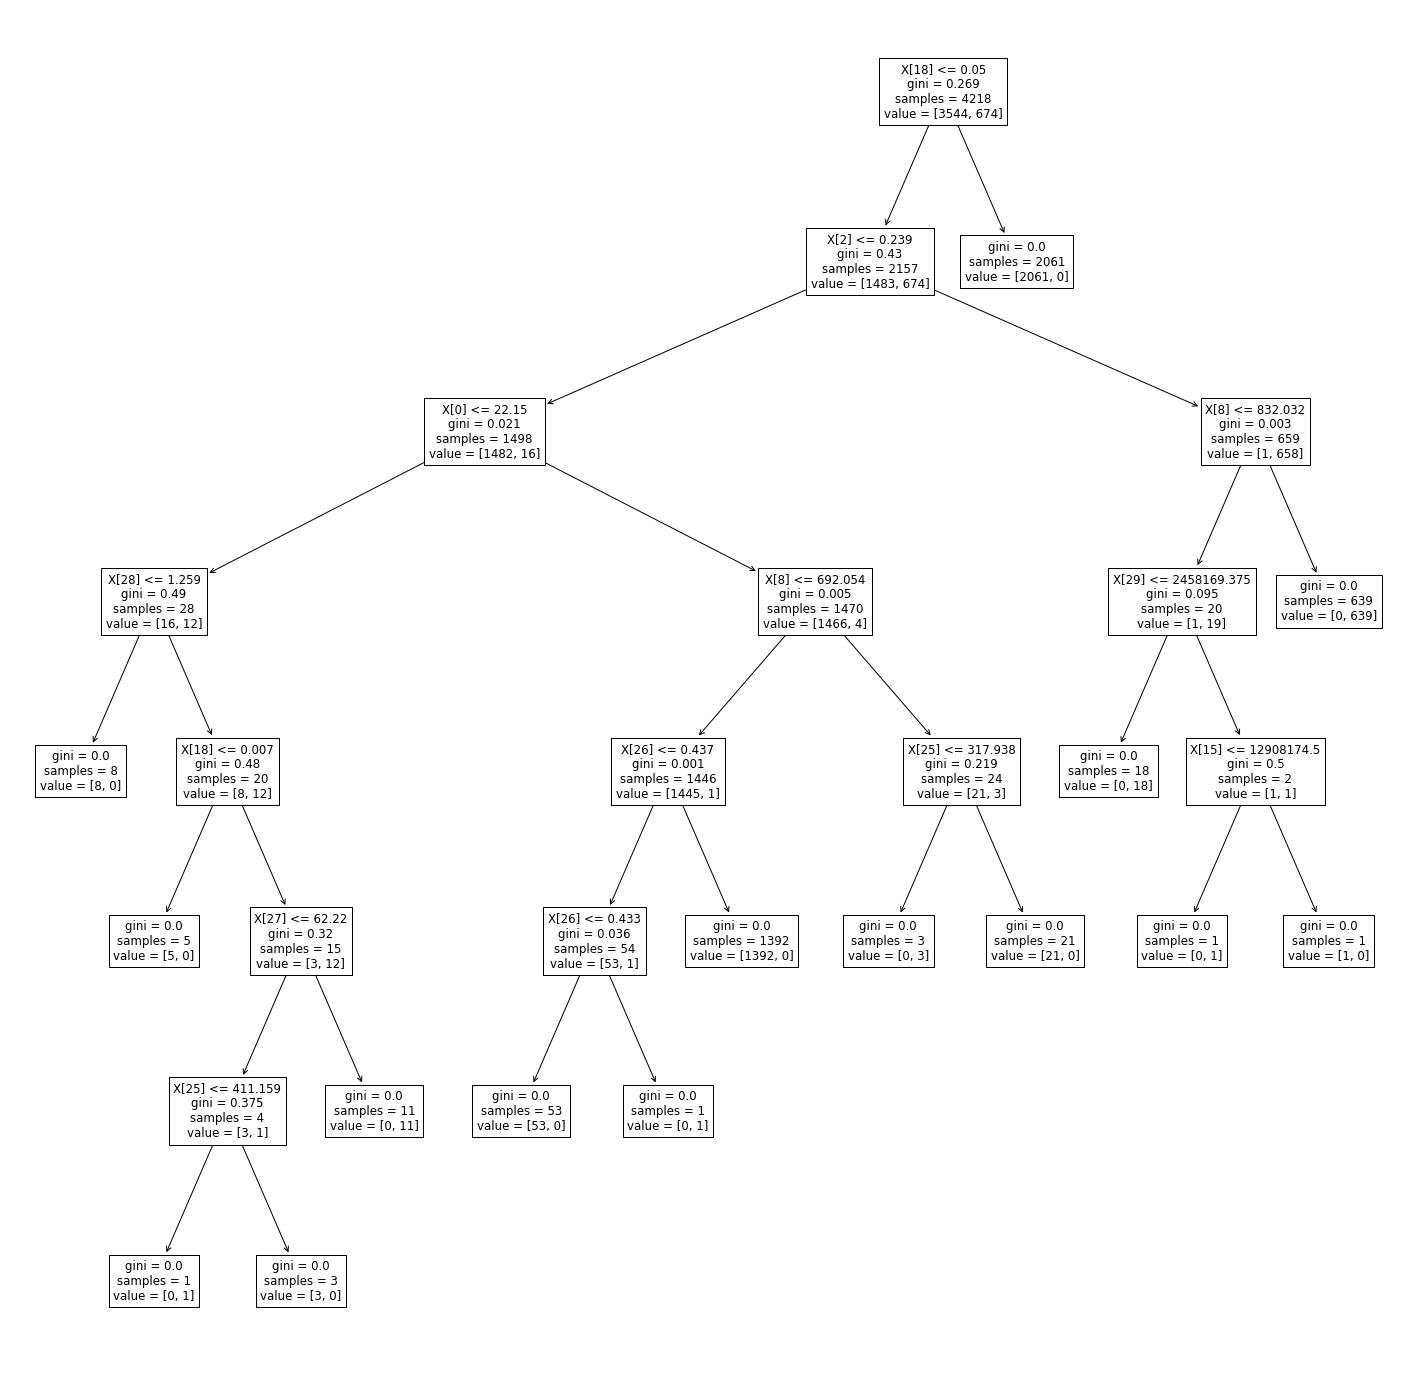

In [42]:
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(clf)

# Influence of Change in parameter on the model

In [43]:
def getModelMetrics(clf):
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on Test Dataset :",metrics.accuracy_score(y_test, y_pred))
    print("Accuracy on Train Dataset :",metrics.accuracy_score(y_train, clf.predict(X_train)))

## Criterion Parameter

In [44]:
clf = DecisionTreeClassifier(criterion='entropy')
getModelMetrics(clf)

Accuracy on Test Dataset : 0.9914712153518124
Accuracy on Train Dataset : 1.0


In [45]:
clf = DecisionTreeClassifier(criterion='gini')
getModelMetrics(clf)

Accuracy on Test Dataset : 0.9914712153518124
Accuracy on Train Dataset : 1.0


### Inferences :
1. The accuracy is same for both Gini criterion and Entropy criterion.
2. However, there might be a difference between the accuracies when we use cross-validation.

## Splitter Parameter

In [46]:
clf = DecisionTreeClassifier(splitter='best')
getModelMetrics(clf)

Accuracy on Test Dataset : 0.9914712153518124
Accuracy on Train Dataset : 1.0


In [47]:
clf = DecisionTreeClassifier(splitter='random')
getModelMetrics(clf)

Accuracy on Test Dataset : 0.9893390191897654
Accuracy on Train Dataset : 1.0


### Inferences : 
1. The accuracy for the model tuned using the 'best' splitter is more than that for the model tuned using random splitter.
2. Every feature is alloted a value and the best splitter chooses the optimal one at step which can lead to overfitting of model as well.

## Max Depth Parameter

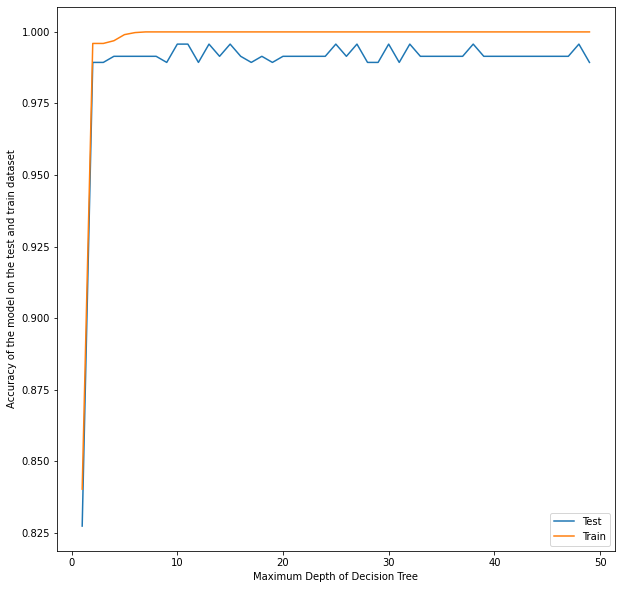

In [48]:
accuracies_test = []
accuracies_train = []
for i in range(1,50): 
 clf = DecisionTreeClassifier(max_depth=i)
 clf = clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracies_test.append(metrics.accuracy_score(y_test, y_pred))
 accuracies_train.append(metrics.accuracy_score(y_train,clf.predict(X_train)))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),accuracies_test)
plt.plot(range(1,50),accuracies_train)
plt.xlabel("Maximum Depth of Decision Tree")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Test","Train"])
plt.show()

### Inferences :
1. With the increase in the maximum depth of the decision tree, the accuracy score on the train dataset increases linearly upto a point approximately 14-15 and finally stabilises at an accuracy level of 1.0 
2. With the increase in the maximum depth of the decision tree, the accuracy score on the test dataset increases linearly upto a point approximately 12-13 and shows very less variation after that point.
3. The model can be tuned at any max_depth value where it observes maximum accuracy.

## Max Feature Parameter

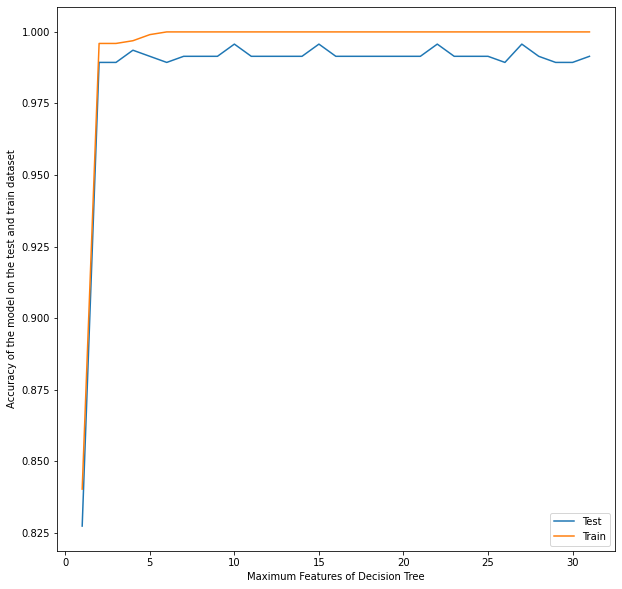

In [49]:
accuracies_test = []
accuracies_train = []
for i in range(1,len(X_train.columns)): 
 clf = DecisionTreeClassifier(max_depth=i)
 clf = clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracies_test.append(metrics.accuracy_score(y_test, y_pred))
 accuracies_train.append(metrics.accuracy_score(y_train,clf.predict(X_train)))
plt.figure(figsize=(10,10))
plt.plot(range(1,len(X_train.columns)),accuracies_test)
plt.plot(range(1,len(X_train.columns)),accuracies_train)
plt.xlabel("Maximum Features of Decision Tree")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Test","Train"])
plt.show()

### Inferences :
1. With the increase in the maximum number of features of the decision tree, the accuracy score on the train dataset :
   - increases linearly upto a point approximately 3-4
   - a non-linear increase for a small range approximately 3 to 6. 
   - finally stabilises at an accuracy level of 1.0 
2. With the increase in the maximum number of features of the decision tree, the accuracy score on the test dataset :
   - increases linearly upto a point approximately 2-3 
   - shows very less variation after that point.
   - However, at a point with the maximum number of features as 15 it attains its maximum accuracy score.
3. The model can be tuned at max_feature = 15 where it observes maximum accuracy.

## Max Leaf nodes Parameter

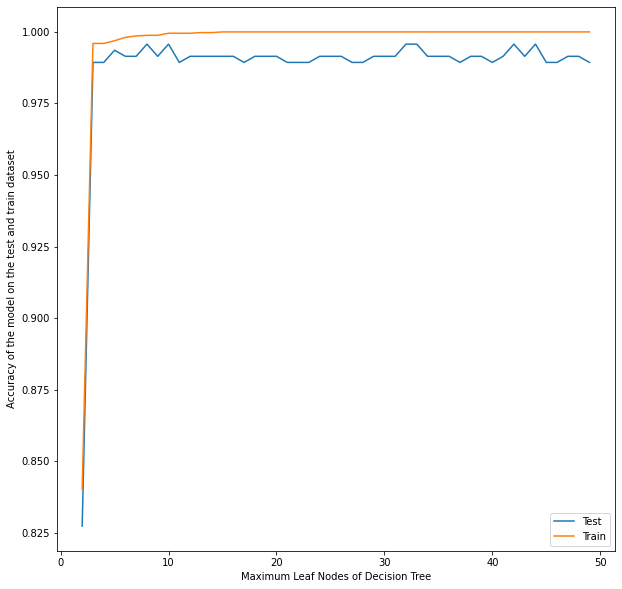

In [50]:
accuracies_test = []
accuracies_train = []
for i in range(2,50): 
 clf = DecisionTreeClassifier(max_leaf_nodes=i)
 clf = clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracies_test.append(metrics.accuracy_score(y_test, y_pred))
 accuracies_train.append(metrics.accuracy_score(y_train,clf.predict(X_train)))
plt.figure(figsize=(10,10))
plt.plot(range(2,50),accuracies_test)
plt.plot(range(2,50),accuracies_train)
plt.xlabel("Maximum Leaf Nodes of Decision Tree")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Test","Train"])
plt.show()

### Inferences :
1. With the increase in the maximum number of leaf nodes of the decision tree, the accuracy score on the train dataset :
   - increases linearly upto a point approximately 3
   - a non-linear increase for a very small region.
   - finally stabilises at an accuracy score of 1.0 
2. With the increase in the maximum number of leaf nodes of the decision tree, the accuracy score on the test dataset :
   - increases linearly upto a point approximately 2 
   - shows very less variation after that point with multiple peaks of accuracy at some levels.
3. The model can be tuned at any maximum leaf nodes value where it observes maximum accuracy.

## Minimum Sample Split Parameter

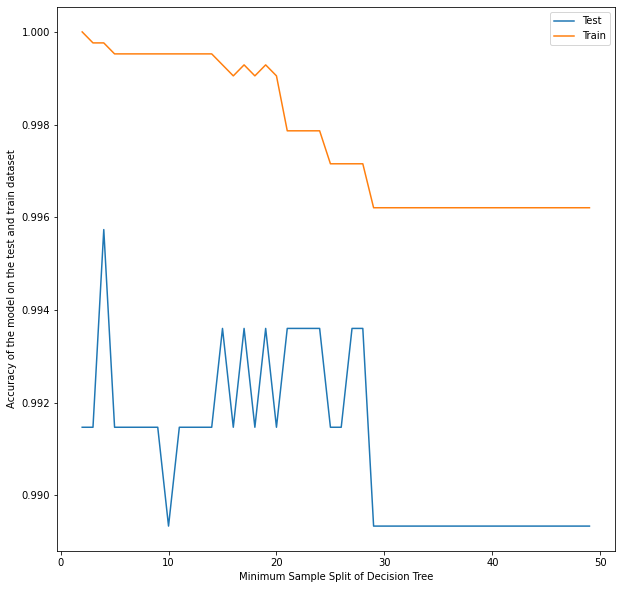

In [51]:
accuracies_test = []
accuracies_train = []
for i in range(2,50): 
 clf = DecisionTreeClassifier(min_samples_split=i)
 clf = clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracies_test.append(metrics.accuracy_score(y_test, y_pred))
 accuracies_train.append(metrics.accuracy_score(y_train,clf.predict(X_train)))
plt.figure(figsize=(10,10))
plt.plot(range(2,50),accuracies_test)
plt.plot(range(2,50),accuracies_train)
plt.xlabel("Minimum Sample Split of Decision Tree")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Test","Train"])
plt.show()

### Inferences :
1. As the minimum sample split of the decision tree increases, the accuracy score on the train dataset decreases (except. between 5 and 11 it increases and stabilises).
2. As the minimum sample split of the decision tree increases, the accuracy score on the test dataset :
   - Peaks at approx. x = 5 and approx. x = 7 to x= = 8
   - It shows some variation in the accuracy and finally stabilises for x > 28(approx)

# Random State Parameter

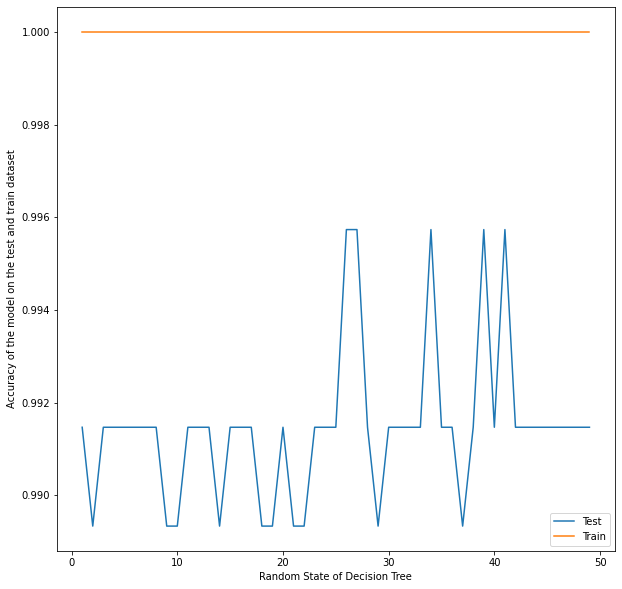

In [52]:
accuracies_test = []
accuracies_train = []
for i in range(1,50): 
 clf = DecisionTreeClassifier(random_state=i)
 clf = clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracies_test.append(metrics.accuracy_score(y_test, y_pred))
 accuracies_train.append(metrics.accuracy_score(y_train,clf.predict(X_train)))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),accuracies_test)
plt.plot(range(1,50),accuracies_train)
plt.xlabel("Random State of Decision Tree")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(["Test","Train"])
plt.show()

### Inferences :
1. Any increase in the random state of the decision tree does not have any effect on the accuracy score.
2. As the random state of the decision tree increases, the accuracy score on the test dataset shows a variation and stablises between x = 40 to x = 50.

# Final Model

In [55]:
clf = DecisionTreeClassifier(random_state=25,min_samples_split=5,max_leaf_nodes=30,max_features=15,max_depth=11,criterion='gini',splitter='best')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [56]:
print("Accuracy on Test Dataset :",metrics.accuracy_score(y_test, y_pred))
print("Accuracy on Train Dataset :",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy on Test Dataset : 0.9936034115138592
Accuracy on Train Dataset : 0.9992887624466572


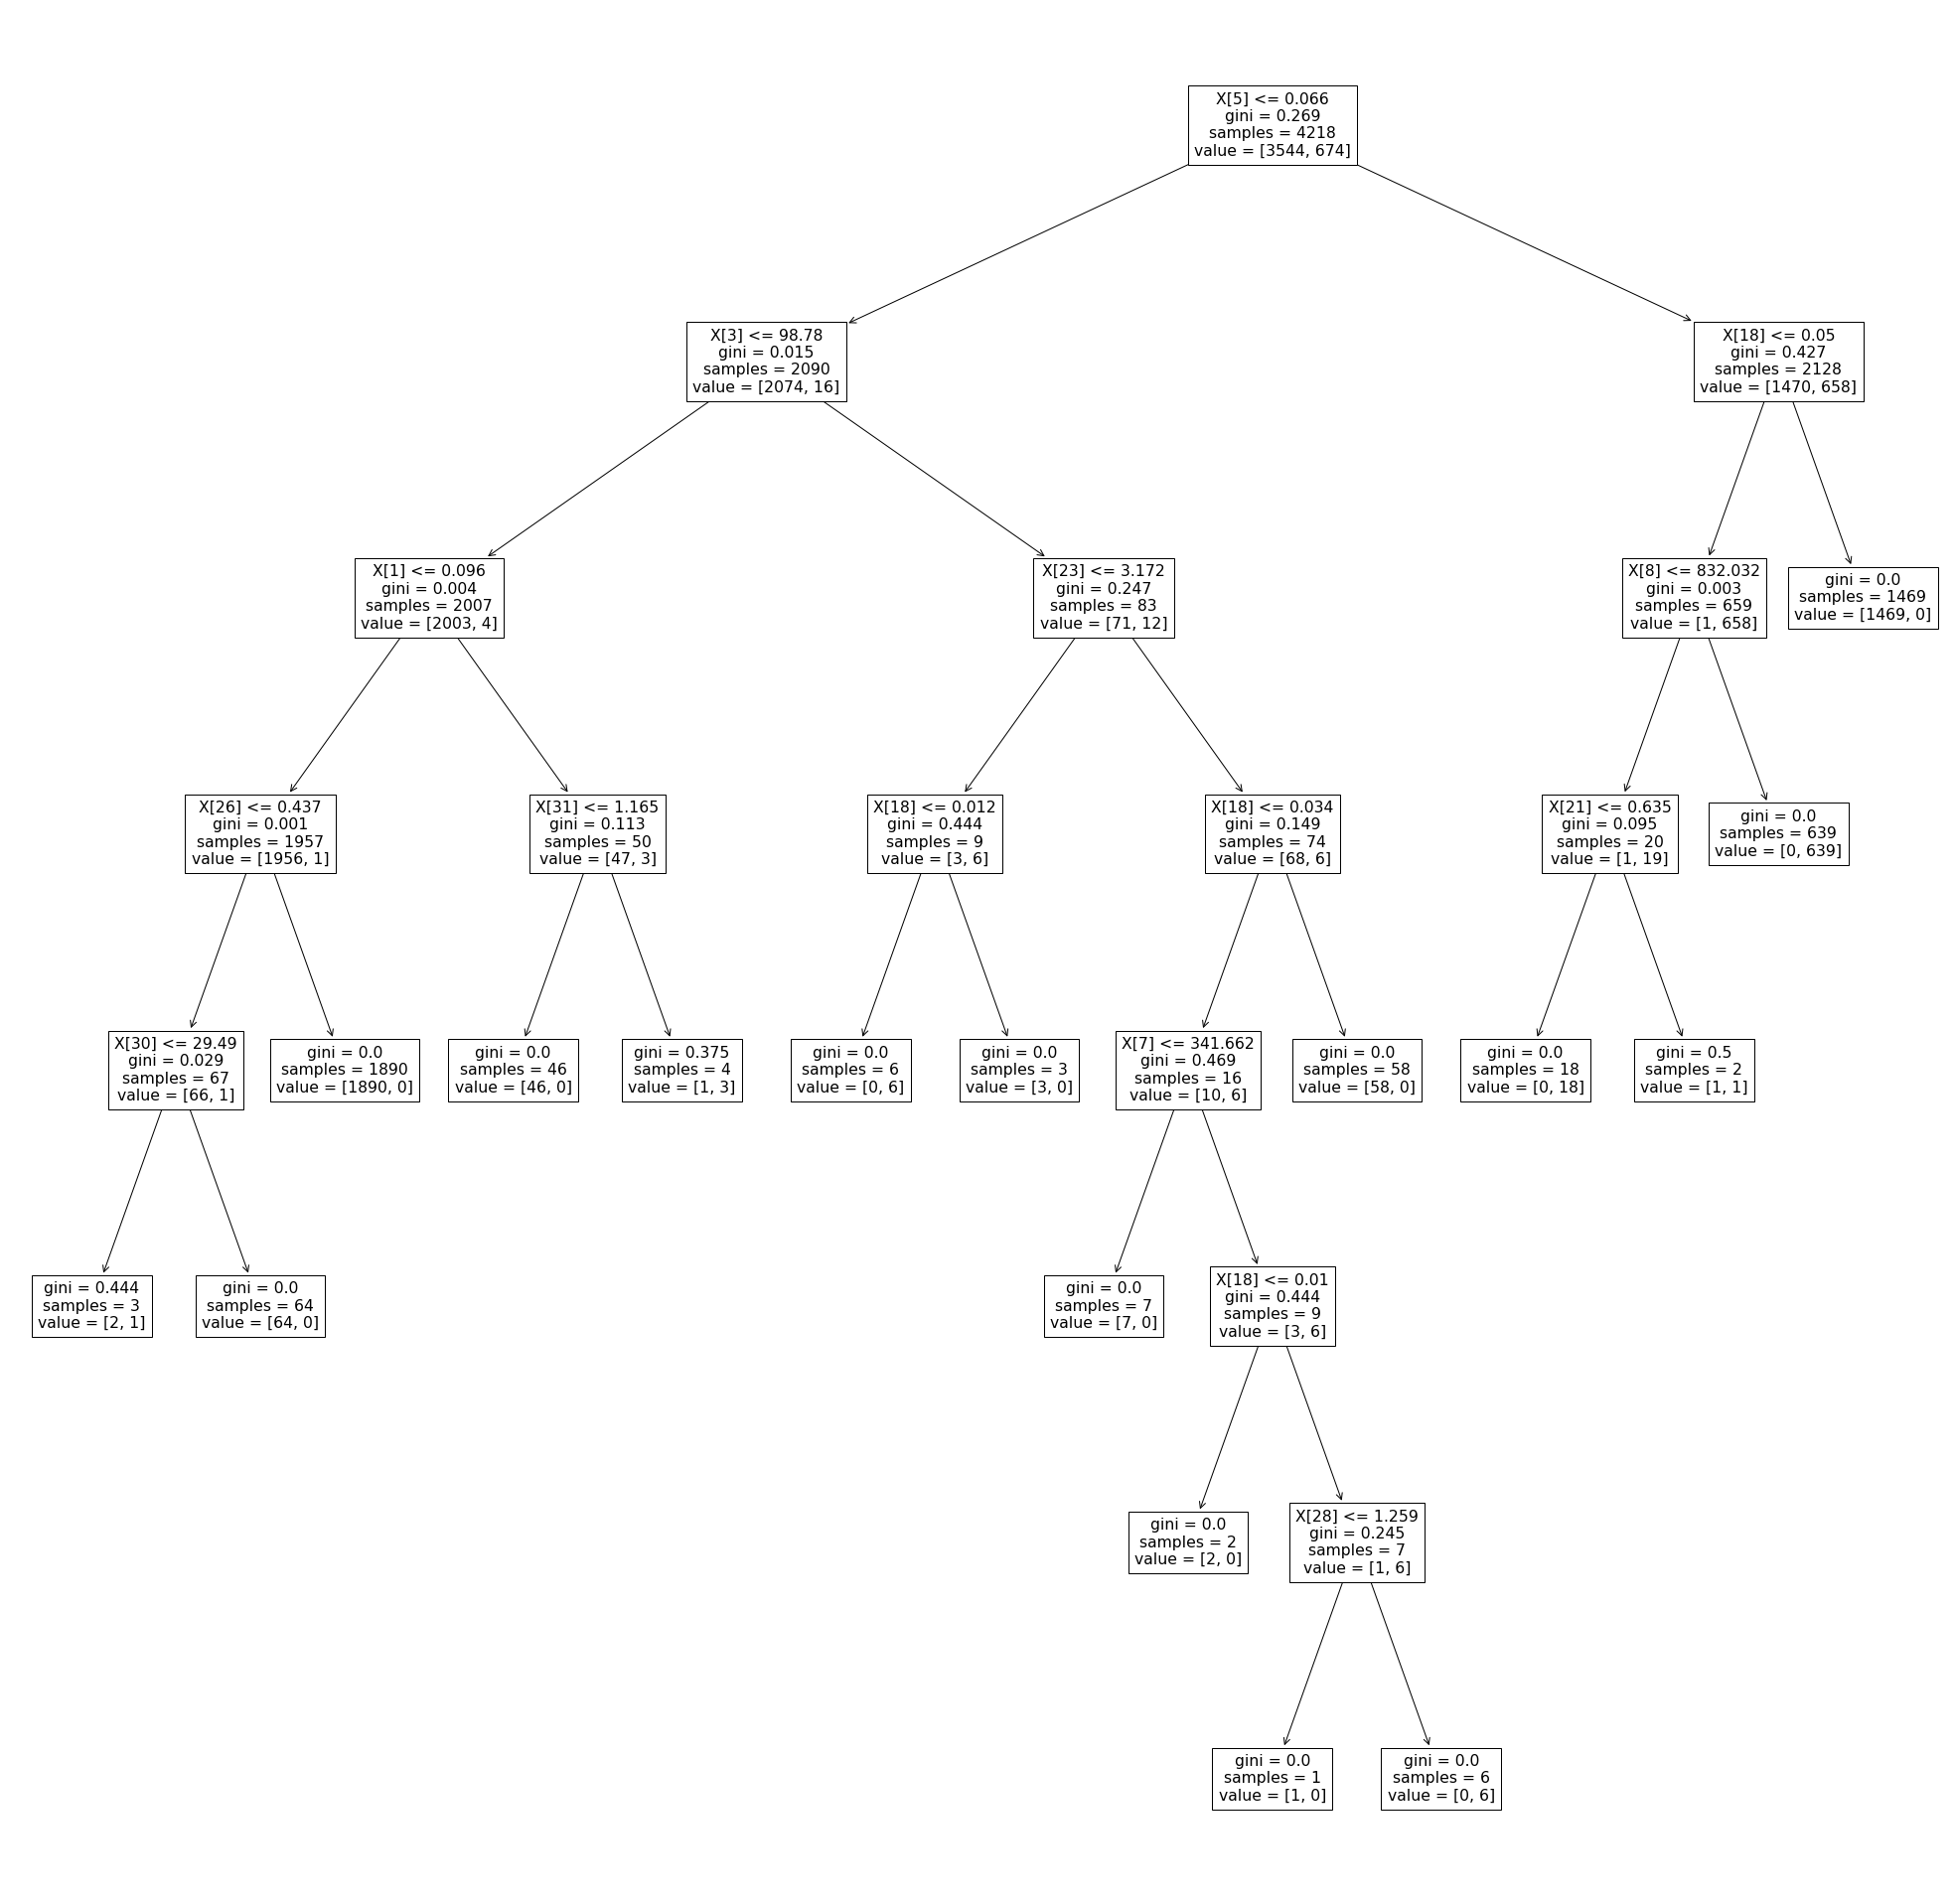

In [60]:
fig = plt.figure(figsize=(35,35))
_ = tree.plot_tree(clf)